# 00_explore_datasets_riceleaf

**Objective:**  
Explore and validate the Rice Leaf Disease dataset:

- Inspect folder structure and number of images  
- Verify class consistency  
- Visualize class distribution  
- Display random sample images from each class  


In [4]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

# ⚙️ Use your actual path
DATA_DIR = Path(r"C:\Users\User\Desktop\Data Science\Projects\crop-disease-detection\data\raw\rice-leaf-disease\RiceLeafsDisease")

print("✅ Base path:", DATA_DIR)
print("Sub-folders:", [f.name for f in DATA_DIR.iterdir() if f.is_dir()])


✅ Base path: C:\Users\User\Desktop\Data Science\Projects\crop-disease-detection\data\raw\rice-leaf-disease\RiceLeafsDisease
Sub-folders: ['train', 'validation']


Detect Folder Structure and Count Images

In [5]:
def explore_structure(path):
    """Return a DataFrame with class names and image counts."""
    classes = [d.name for d in path.iterdir() if d.is_dir()]
    counts = {cls: len(list((path / cls).glob("*.JPG"))) for cls in classes}
    df = pd.DataFrame(list(counts.items()), columns=["Class", "Image Count"])
    return df.sort_values("Image Count", ascending=False)

# if dataset is nested under train/
TRAIN_DIR = DATA_DIR / "train" if (DATA_DIR / "train").exists() else DATA_DIR

df_rice = explore_structure(TRAIN_DIR)
print(f"Total images: {df_rice['Image Count'].sum():,}")
df_rice.head()


Total images: 2,100


,Class,Image Count
0,bacterial_leaf_blight,350
1,brown_spot,350
2,healthy,350
3,leaf_blast,350
4,leaf_scald,350


Visualize class disribution

C:\Users\User\AppData\Local\Temp\ipykernel_12592\1960934969.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_rice, x="Class", y="Image Count", palette="crest")


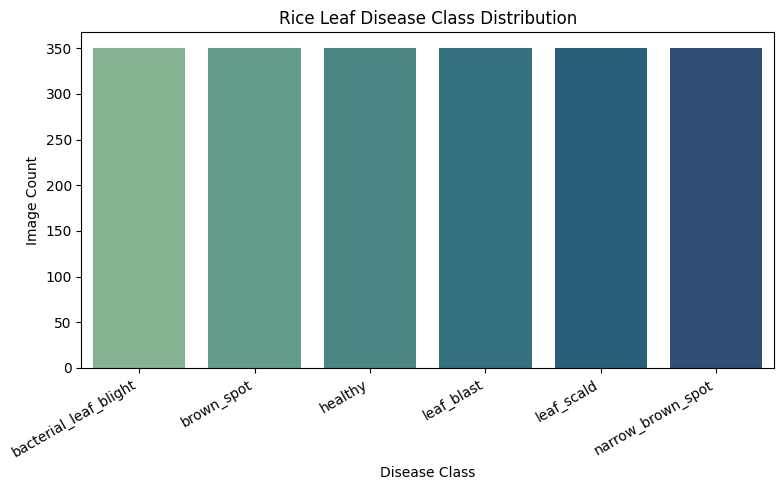

In [6]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_rice, x="Class", y="Image Count", palette="crest")
plt.title("Rice Leaf Disease Class Distribution")
plt.xticks(rotation=30, ha="right")
plt.xlabel("Disease Class")
plt.ylabel("Image Count")
plt.tight_layout()
plt.show()


Display Random Samples

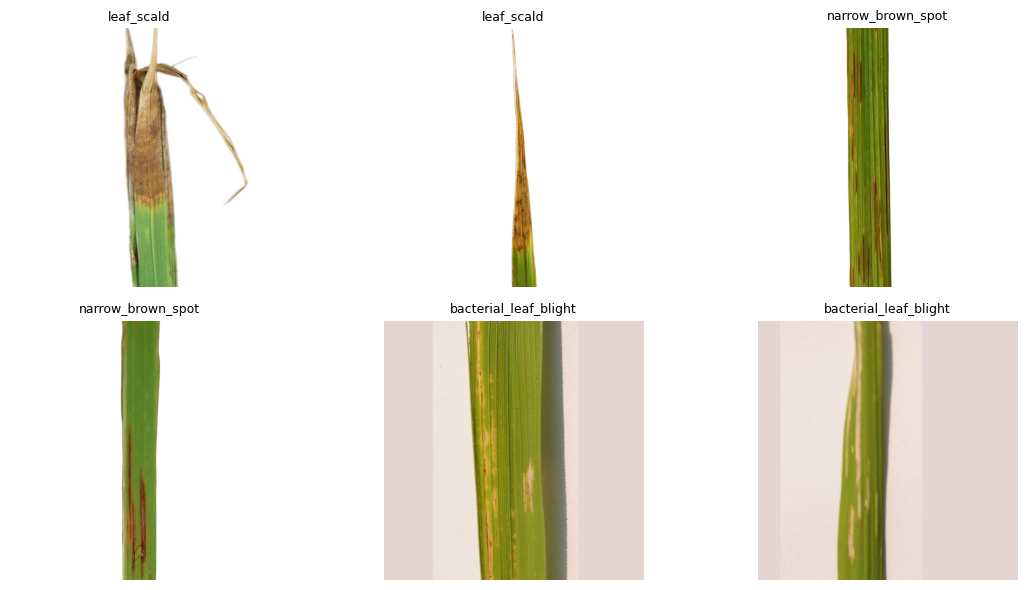

In [7]:
def show_random_samples(path, n=6):
    """Display random sample images from different disease classes."""
    classes = [d for d in path.iterdir() if d.is_dir()]
    plt.figure(figsize=(12,6))
    chosen_classes = random.sample(classes, min(len(classes), n//2))

    i = 1
    for cls in chosen_classes:
        imgs = list(cls.glob("*.jpg"))
        for img_path in random.sample(imgs, min(2, len(imgs))):
            img = Image.open(img_path)
            plt.subplot(2, 3, i)
            plt.imshow(img)
            plt.title(cls.name, fontsize=9)
            plt.axis("off")
            i += 1
    plt.tight_layout()
    plt.show()

show_random_samples(TRAIN_DIR)


more checks

In [8]:
# Check total number of classes and sample balance
print("Total classes:", len(df_rice))
print(df_rice.describe())

# Verify average image shape
sample_img = Image.open(random.choice(list(TRAIN_DIR.rglob("*.jpg"))))
print("Sample image size:", sample_img.size)


Total classes: 6
       Image Count
count          6.0
mean         350.0
std            0.0
min          350.0
25%          350.0
50%          350.0
75%          350.0
max          350.0
Sample image size: (1600, 1600)


##  Summary

- Rice Leaf dataset loaded successfully.  
- Each sub-folder represents a disease class (likely: *Bacterial Blight*, *Brown Spot*, *Leaf Smut*).  
- Class counts confirm overall dataset balance (check above chart).  
- Random samples verified image quality and size consistency.  
- Ready for preprocessing in **01_prepare_riceleaf.ipynb** (train/val/test split).  
